In [1]:
import pickle
import numpy as np

import sys
from GSP_helper import cleanup, runGsp
from matplotlib import pyplot as plt

from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs


In [2]:
inputs_list = ["N1", "P0", "T0", "Mach", "HP"]
output_list = ["TT25", "TT3", "Ps3", "TT49", "Wf", "N2", "Re2", "Re25", "Re3", "Re4", "Re49", "Re5", "Re14", "Re19"]

In [3]:
GEnx_OD, GEnx_OD_true, N1cCEOD = pickle.load(open("CEOD_input.p", "rb"))
_, All_Reynolds = pickle.load(open("Constants/Reynolds_set_Valid.p", "rb"))

In [4]:
take_off_Reynolds, climb_Reynolds, cruise_Reynolds = All_Reynolds
take_off_GEnx_OD, climb_GEnx_OD, cruise_GEnx_OD = GEnx_OD
take_off_GEnx_OD_true, climb_GEnx_OD_true, cruise_GEnx_OD_true = GEnx_OD_true

(28, 8)


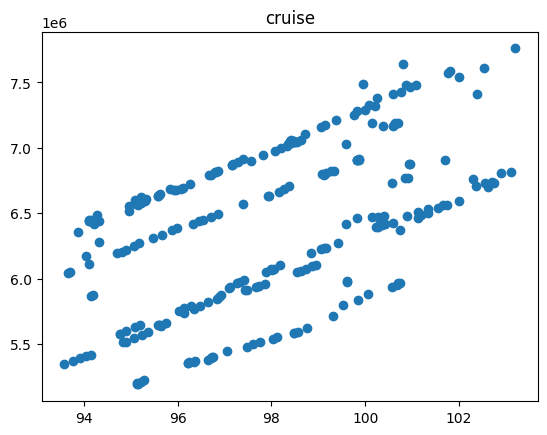

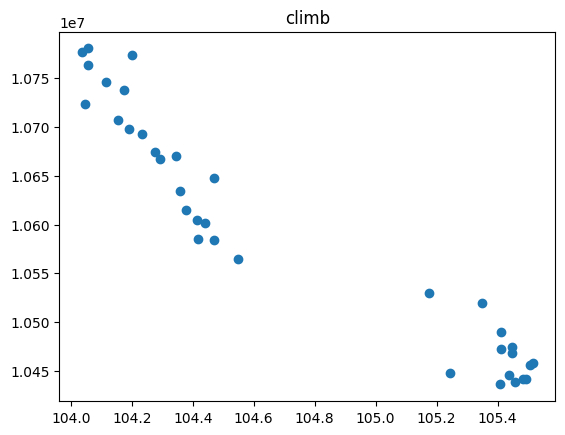

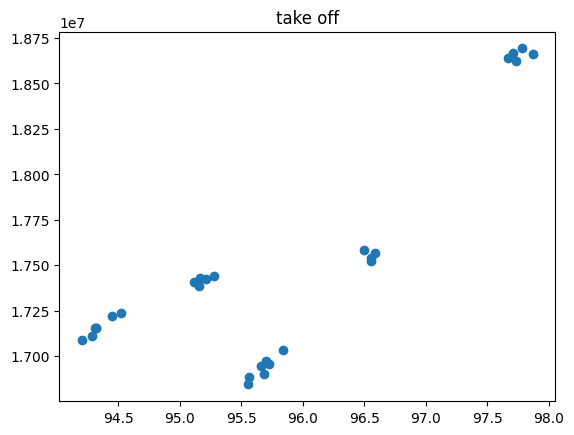

In [16]:
print(take_off_Reynolds.shape)
idx = 1
plt.scatter(cruise_GEnx_OD[:, 0], cruise_Reynolds[:, idx])
plt.title("cruise")
plt.show()

plt.scatter(climb_GEnx_OD[:, 0], climb_Reynolds[:, idx])
plt.title("climb")
plt.show()

plt.scatter(take_off_GEnx_OD[:, 0], take_off_Reynolds[:, idx])
plt.title("take off")
plt.show()

In [6]:
def create_clusters(dataset, n_clusters):
    k_means = KMeans(init='k-means++', n_clusters=n_clusters, n_init=10)
    k_means.fit(dataset)
    k_means_cluster_centers = k_means.cluster_centers_
    return k_means_cluster_centers


In [7]:
# stacked_cruise_Reynolds = np.concatenate((cruise_RGEnx_OD, 
#                                           np.reshape(cruise_Reynolds[:, i], (cruise_Reynolds[:, idx].shape[0],1))),
#                                          axis=1)
stacked_cruise_Reynolds = np.concatenate(((cruise_GEnx_OD,
                                           cruise_GEnx_OD_true,
                                         cruise_Reynolds)),
                                         axis=1)
print(stacked_cruise_Reynolds.shape)
print(cruise_GEnx_OD_true.shape)

clusters_cruise_array = create_clusters(stacked_cruise_Reynolds, 10)

(246, 19)
(246, 6)


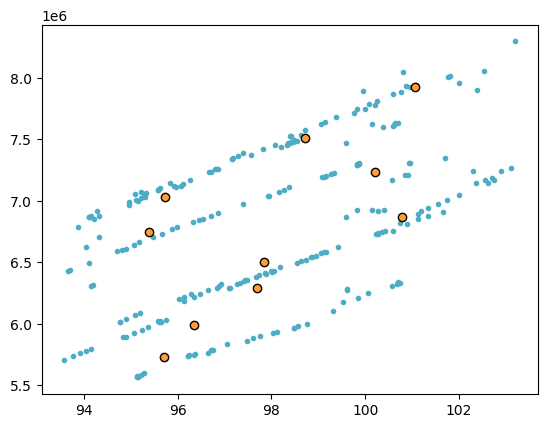

In [17]:
colors = ['#4EACC5', '#FF9C34', '#4E9A06']
input_idx = 0
idx = 5
plt.scatter(cruise_GEnx_OD[:, input_idx], cruise_Reynolds[:, idx],color=colors[0], marker='.')

plt.plot(clusters_cruise_array[:, input_idx], clusters_cruise_array[:, 11+idx], 'o', markerfacecolor=colors[1],
                 markeredgecolor='k', markersize=6)
plt.show()

In [9]:
stacked_take_off_Reynolds = np.concatenate(((take_off_GEnx_OD,
                                             take_off_GEnx_OD_true,
                                         take_off_Reynolds)),
                                         axis=1)
print(stacked_take_off_Reynolds.shape)
print(take_off_Reynolds[:,1])

clusters_take_off_array = create_clusters(stacked_take_off_Reynolds, 5)

(28, 19)
[18660698.2305537 18692119.768051  18624530.0151094 18668231.8393399
 18640643.016018  17566240.5070579 17525135.5094881 17537704.9763301
 17585361.8671607 17033392.7672315 16957491.1772357 16971630.1519448
 16900976.8162555 16944077.5941932 16884324.4743605 16844930.228194
 17440408.3679549 17427080.5015981 17431413.8181825 17386712.2046631
 17408273.7632208 17235722.0480129 17224040.0652625 17153476.7650056
 17156641.0659783 17158019.3694565 17113130.4261211 17087569.9281928]


[18660698.2305537 18692119.768051  18624530.0151094 18668231.8393399
 18640643.016018  17566240.5070579 17525135.5094881 17537704.9763301
 17585361.8671607 17033392.7672315 16957491.1772357 16971630.1519448
 16900976.8162555 16944077.5941932 16884324.4743605 16844930.228194
 17440408.3679549 17427080.5015981 17431413.8181825 17386712.2046631
 17408273.7632208 17235722.0480129 17224040.0652625 17153476.7650056
 17156641.0659783 17158019.3694565 17113130.4261211 17087569.9281928]


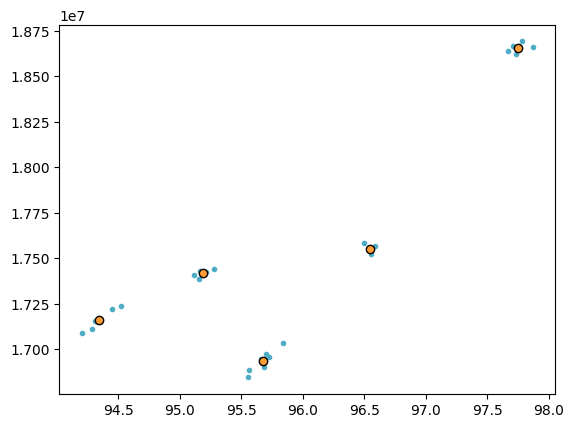

In [11]:
colors = ['#4EACC5', '#FF9C34', '#4E9A06']
input_idx = 0
idx = 1

print(take_off_Reynolds[:, idx])
plt.scatter(take_off_GEnx_OD[:, input_idx], take_off_Reynolds[:, idx],color=colors[0], marker='.')

plt.plot(clusters_take_off_array[:, input_idx], clusters_take_off_array[:, 11+idx], 'o', markerfacecolor=colors[1],
                 markeredgecolor='k', markersize=6)
plt.show()

In [13]:
stacked_climb_Reynolds = np.concatenate(((climb_GEnx_OD, 
                                          climb_GEnx_OD_true,
                                         climb_Reynolds)),
                                         axis=1)
print(stacked_climb_Reynolds.shape)

clusters_climb_array = create_clusters(stacked_climb_Reynolds, 5)

(35, 19)


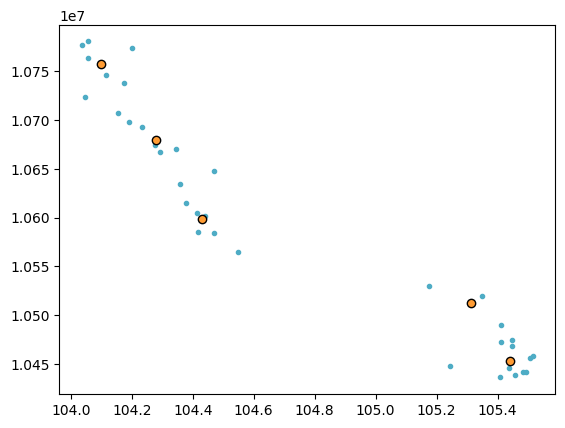

In [14]:
colors = ['#4EACC5', '#FF9C34', '#4E9A06']
input_idx = 0
idx = 1
plt.scatter(climb_GEnx_OD[:, input_idx], climb_Reynolds[:, idx],color=colors[0], marker='.')

plt.plot(clusters_climb_array[:, input_idx], clusters_climb_array[:, 11+idx], 'o', markerfacecolor=colors[1],
                 markeredgecolor='k', markersize=6)
plt.show()

In [57]:
# print(clusters_take_off_array.shape)
Genx_input_array = np.concatenate((clusters_take_off_array[:, :5],
                                   clusters_climb_array[:, :5],
                                  clusters_cruise_array[:, :5]))

Genx_true_array = np.concatenate((clusters_take_off_array[:, 5:11],
                                   clusters_climb_array[:, 5:11],
                                  clusters_cruise_array[:, 5:11]))

Reynolds_array = np.concatenate((clusters_take_off_array[:, 11:],
                                   clusters_climb_array[:, 11:],
                                  clusters_cruise_array[:, 11:]))

print(Genx_true_array.shape)
# Genx_true_array = np.concatenate((clusters_take_off_array[]))

(20, 6)


In [56]:
#write everything to pickle

pickle.dump([Genx_input_array, Genx_true_array, Reynolds_array], open("Constants/Reynolds_input_clusters.p", "wb"))